In [1]:
# Not validated solutions

### ex. 5.1

In [2]:
import numpy as np

In [3]:
D = 2.5
m = 2000
rho_w = 64
# no friction of water 
CM = 0
g = 9.81*3.28084
# v - displacement
# restoring force dW equals weight of the water displaced by the motion v

In [4]:
# dW=pi*(D/2)**2*v*rho_w

In [5]:
# equation of motion 
# mg-(mg+dW)=m*ddv
# 2000*g-(2000*g+pi*(D/2)**2*v*rho_w)=2000*ddv
# 2000*ddv+pi*(D/2)**2*rho_w*v=0

In [6]:
omega = np.sqrt(np.pi*(D/2)**2*rho_w/2000)

In [7]:
omega

0.3963327297606011

In [8]:
T = 2*np.pi/omega

In [9]:
T

15.853309190424044

### ex. 5.2

In [10]:
R = 3.5
h = 1.75
T = 2
g = 9.81*3.28084
rho_w = 64

In [11]:
m = 2*np.pi*R**3*rho_w/(3*g)

In [12]:
m

178.56184393563566

In [13]:
# J0*ddtheta+m*g*h*theta=0

In [14]:
# omega = np.sqrt(m*g*h/J0) |=> omega**2=m*g*h/J0

In [15]:
omega = 2*np.pi/T

In [16]:
J0 = m*g*h/omega**2

In [17]:
# J0 = JG + m*h**2

In [18]:
JG = J0-m*h**2

In [19]:
JG

472.1704019168243

### ex. 5.3

In [20]:
from sympy import symbols, sin, diff

In [21]:
# J0*ddtheta+m*g*h*theta=0

In [22]:
# J0 = JG + m*h**2

In [23]:
# JG = m0*a**2/6 , where a - side of a square

In [24]:
a = 60
h = 3.5
g = 9.81*3.28084

In [25]:
m0 = symbols('m_0')

In [26]:
J0 = m0*a**2/6+m0*h**2

In [27]:
J0

612.25*m_0

In [28]:
omega = np.sqrt(float(m0*g*h/J0))

In [29]:
omega

0.4289401058110719

In [30]:
T = 2*np.pi/omega

In [31]:
T

14.648164678606753

### ex.5.4

In [32]:
from sympy import *

In [33]:
x, l = symbols('x, l')

In [34]:
Psi = sin(pi*x/l)

In [35]:
dPsi=diff(Psi,x)

In [36]:
dPsi

pi*cos(pi*x/l)/l

In [37]:
Psi.evalf(subs={x:0})

0

In [38]:
dPsi.subs({x:0})

pi/l

In [39]:
Psi.subs({x:l})

0

In [40]:
dPsi.subs({x:l})

-pi/l

In [41]:
v0, omega0, t = symbols('v_0, omega_0, t')

In [42]:
v=v0*Psi*sin(omega0*t)

In [43]:
v

v_0*sin(omega_0*t)*sin(pi*x/l)

In [44]:
N, EI = symbols('N, EI')

In [45]:
U=N/2*integrate(EI*diff(v,x,2)**2, (x,0,l))

In [46]:
simplify(U)

Piecewise((pi**4*EI*N*v_0**2*sin(omega_0*t)**2/(4*l**3), ((l > -oo) | (l > 0)) & ((l > -oo) | (l < oo)) & ((l > 0) | (l < 0)) & ((l < 0) | (l < oo))), (0, l >= 0))

In [47]:
# sin(omega0*t)=1 for max energy, N = 1 |=>
U_max=pi**4*EI*v0**2/(4*l**3)

In [48]:
m_hat,f1 = symbols('m_hat,f1')

In [49]:
K_max=1/2*m_hat*v0**2*omega0**2*integrate(Psi**2, (x,0,l))

In [50]:
K_max = 0.5*m_hat*omega0**2*v0**2*l/2

In [51]:
omega0_1=solve(U_max-K_max, [omega0])[1]

In [52]:
omega0_1

9.86960440108936*sqrt(EI/m_hat)/l**2

In [53]:
omega0_=sqrt(192*EI/(l**4*f1*m_hat))

In [54]:
solve(omega0_1 - omega0_, [f1])

[1.97106859289939]

### ex.5.5

In [55]:
Psi = 1-cos(pi*x/(2*l))

In [56]:
Psi

1 - cos(pi*x/(2*l))

In [57]:
diff(Psi,x)

pi*sin(pi*x/(2*l))/(2*l)

In [58]:
v = v0*Psi*sin(omega0*t)
v_max=v0*Psi

In [59]:
v_max

v_0*(1 - cos(pi*x/(2*l)))

In [60]:
m_d,g,d,m_hat0 = symbols('m_d,g,d,m_hat0')

In [61]:
V_max=3/2*integrate(EI*diff(v_max,x,2)**2, (x,0,l))-1/2*m_d*g*integrate(diff(v_max,x,2)**2, (x,0,l))

In [62]:
V_max

-0.5*g*m_d*Piecewise((pi**4*v_0**2/(32*l**3), (l > -oo) & (l < oo) & Ne(l, 0)), (pi**4*v_0**2/(16*l**3), True)) + 1.5*Piecewise((pi**4*EI*v_0**2/(32*l**3), (l > -oo) & (l < oo) & Ne(l, 0)), (pi**4*EI*v_0**2/(16*l**3), True))

In [63]:
V_max=-0.5*g*m_d*pi**4*v0**2/(32*l**3)+1.5*pi**4*EI*v0**2/(32*l**3)

In [64]:
V_max

0.046875*pi**4*EI*v_0**2/l**3 - 0.015625*pi**4*g*m_d*v_0**2/l**3

In [65]:
K_max = (3/2*integrate(m_hat*diff(v,t)**2, (x,0,d))+3/2*integrate(m_hat0*diff(v,t)**2, (x,d,l))
        +  1/2*m_d*diff(v0*(1-cos(pi*l/l))*sin(omega0*t),t)**2)

In [66]:
simplify(K_max)

omega_0**2*v_0**2*(0.75*l*m_hat0*(-8 + 3*pi) + 2.0*pi*m_d + 0.75*m_hat*(3*pi*d - 8*l*sin(pi*d/(2*l)) + l*sin(pi*d/l)) - 0.75*m_hat0*(3*pi*d - 8*l*sin(pi*d/(2*l)) + l*sin(pi*d/l)))*cos(omega_0*t)**2/pi

In [67]:
K_max = omega0**2*v0**2*(0.75*l*m_hat0*(-8+3*pi)+2*pi*m_d+
                         0.75*m_hat*(3*pi*d - 8*l*sin(pi*d/(2*l))+l*sin(pi*d/l))-
                        -0.75*m_hat0*(3*pi*d-8*l*sin(pi*d/(2*l))+l*sin(pi*d/l)))

In [68]:
omega0_ = solve(U_max-K_max, [omega0])[1]

In [69]:
omega0_

9.86960440108936*sqrt(EI/(l**3*(28.2743338823081*d*m_hat + 28.2743338823081*d*m_hat0 - 24.0*l*m_hat*sin(1.5707963267949*d/l) + 3.0*l*m_hat*sin(3.14159265358979*d/l) - 24.0*l*m_hat0*sin(1.5707963267949*d/l) + 3.0*l*m_hat0*sin(3.14159265358979*d/l) + 4.27433388230814*l*m_hat0 + 25.1327412287183*m_d)))

In [70]:
Om = (omega0_.subs({d:2880, 
                    m_hat: 1417/386,
                    g:386,
                    l:2880,
                    m_d:1.02e7/386,
                    m_hat0:237/386,
             EI:30e6*2.114e6})).evalf()

In [71]:
Om

0.597480998708820

In [72]:
T = 2*np.pi/Om

In [73]:
T

10.5161257358105

In [74]:
omega0_1 = ((36*EI/l**3)/(3*m_hat*f1*d+3*m_hat0*(l-d)*f1+m_d))**0.5

In [75]:
solve(omega0_1 - omega0_, [f1])[0].subs({d:2880, 
                                      m_hat: 1417/( 386),
                                     g:386,
                                     l:2880,
                                     m_d:1.02e7/( 386),
                                     m_hat0:237/( 386)})

7.60811324078799

The fundamental period of oscillation is a bit higher than that of in problem 5.4, but still is lower than that of the periods of the highest energy offshore waves of 12-15 sec in a typical sea state.

### ex. 5.6

The offset of the center of buoyancy from the centerline of a monopod gravity platform can significantly impact its rocking frequency. Here's a qualitative discussion on how this happens:

1. Restoring Force and Stability:
- The center of buoyancy is the point where the buoyant force, which acts upward, is considered to act. When this center is offset from the centerline, it creates an asymmetry in the distribution of buoyant forces.

- This asymmetry affects the restoring torque that acts to bring the platform back to its equilibrium position when it is tilted. A larger offset can lead to a stronger restoring torque, which can increase the rocking frequency.

2. Rotational Dynamics:
- The offset introduces a rotational component to the platform's dynamics. This means that any tilt will not only cause a vertical displacement but also a rotational motion around the new center of buoyancy.

- The interaction between the rotational and translational motions can lead to complex oscillatory behavior, potentially increasing the rocking frequency due to the added rotational inertia.

3. Hydrodynamic Effects:
- The offset center of buoyancy changes the hydrodynamic profile of the platform. This can alter the drag forces acting on the structure as it rocks back and forth.

- Increased drag can dampen the oscillations, potentially reducing the amplitude but not necessarily the frequency of the rocking motion.

4. Resonance Phenomena:
- If the offset leads to a specific ratio between the rotational and translational timescales, resonance phenomena can occur. This can amplify the rocking motion at certain frequencies, making the platform more susceptible to oscillations at those frequencies.

Overall, the offset of the center of buoyancy introduces additional complexities to the platform's dynamics, affecting both the stability and the frequency of its rocking motion. Understanding these effects is crucial for designing stable and efficient monopod gravity platforms.

### ex. 5.7 

When the center of mass (G) and the center of buoyancy (B) of a gravity platform are coincident, it has significant implications for both the rocking frequency and the dynamic stability of the structure. Here's a qualitative discussion:

Rocking Frequency
1. Reduction in Restoring Moment:
- When G and B are coincident, the restoring moment that acts to return the platform to its equilibrium position when tilted is minimized. This is because the lever arm, which is the distance between G and B, is zero.

- As a result, the platform will have a lower natural frequency of oscillation, meaning the rocking frequency will decrease. The platform will rock more slowly because there is less force acting to restore it to its original position.

Dynamic Stability
1. Neutral Stability:
- With G and B coincident, the platform is in a state of neutral equilibrium. This means that if the platform is tilted, it will not return to its original position nor will it continue to tilt further. Instead, it will remain in the new position.

- This neutral stability can be problematic in a dynamic environment, such as in the presence of waves or currents, because the platform can easily be displaced from its equilibrium position and remain tilted.

2. Sensitivity to External Forces:
- The platform becomes more sensitive to external forces and disturbances. Since there is no significant restoring moment, even small forces can cause large displacements.

- This increased sensitivity can lead to greater oscillations and potential instability in rough sea conditions.

3. Potential for Capsizing:
- In extreme cases, if the platform is subjected to large enough forces, it may not have the necessary restoring force to prevent capsizing. This is because the coincident G and B do not provide the stabilizing torque needed to counteract large tilts.

Summary
Overall, while coincident centers of mass and buoyancy can simplify the design and reduce the rocking frequency, they also introduce significant risks to the dynamic stability of the platform. Ensuring stability in such a configuration would require careful consideration of the platform's operational environment and additional stabilizing mechanisms.

### ex.5.8

#### a).

The motion can be described by Newton's second law, considering the forces acting on the platform. Since the motion is undamped, we only need to consider the restoring force due to the soil foundation stiffness (k1).

In [76]:
# m*ddv+k1*v=0

In [77]:
# k1 is in accord with eq. 2.76

#### b).

In [78]:
v0, omega0, t, k1, m, a1, b1 = symbols('v0, omega0, t, k1, m, a1, b1')

In [79]:
v=v0*sin(omega0*t)

In [80]:
diff(v,t,2)

-omega0**2*v0*sin(omega0*t)

In [81]:
# -m*omega0**2*v0*sin(omega0*t)+k1*v0*sin(omega0*t)=0

In [82]:
# omega0**2*m=a1-b1*omega0

In [83]:
sol=solve(omega0**2*m+b1*omega0-a1, omega0)

In [84]:
sol

[(-b1 - sqrt(4*a1*m + b1**2))/(2*m), (-b1 + sqrt(4*a1*m + b1**2))/(2*m)]

In [85]:
omega0 = sol[1]

In [86]:
omega0

(-b1 + sqrt(4*a1*m + b1**2))/(2*m)

#### c).

In [87]:
Gs = 10e6 # 50
vi = 0.33
r0 = 45
rho_s =2000
m0 = 3.56e8

In [88]:
a1=8*Gs/(2-vi)*r0
b1=8*Gs/(2-vi)*0.05*r0*np.sqrt(rho_s/Gs)*r0

In [89]:
a1

2155688622.754491

In [90]:
omega0_1 = (-b1 + np.sqrt(4*a1*m0 + b1**2))/(2*m0)

In [91]:
omega0_1

2.3662987797922628

In [92]:
T_1 = 2*np.pi/omega0_1

In [93]:
T_1

2.6552797815883533

In [94]:
Gs = 50e6 
vi = 0.33
r0 = 45
rho_s =2000
m0 = 3.56e8
mb = 2.59e8

In [95]:
a1=8*Gs/(2-vi)*r0
b1=8*Gs/(2-vi)*0.05*r0*np.sqrt(rho_s/Gs)*r0

In [96]:
a1

10778443113.772455

In [97]:
omega0_2 = (-b1 + np.sqrt(4*a1*m0 + b1**2))/(2*m0)

In [98]:
omega0_2

5.291204926690305

In [99]:
T_2 = 2*np.pi/omega0_2

In [100]:
T_2

1.1874772181824704

#### d).

When both rocking and sliding motions occur simultaneously in a structure, the dominant vibration mode depends on several factors, including the mass distribution, foundation stiffness, and the natural frequencies of each mode.

Factors Influencing Dominance:
1. Natural Frequencies:

2. Mass Distribution and Moment of Inertia:
- Structures with a higher moment of inertia (e.g., tall or top-heavy structures) are more likely to exhibit dominant rocking motion.

- Structures with a lower center of mass and more uniform mass distribution are more likely to exhibit dominant sliding motion.

3. Foundation Stiffness:
- If the soil foundation provides greater horizontal stiffness compared to rotational stiffness, sliding motion may dominate.

- Conversely, if the rotational stiffness is higher, rocking motion may dominate.

Dominance of Vibration Modes:
- Sliding Dominance: If the natural frequency of sliding  is lower than that of rocking, the structure will tend to slide more easily. This is often the case for structures with a low center of mass and high horizontal stiffness.

- Rocking Dominance: If the natural frequency of rocking is lower than that of sliding, the structure will tend to rock more. This is common in structures with a high center of mass and significant moment of inertia.

Practical Considerations:
- Damping Effects: In real-world scenarios, damping can influence which mode dominates. Structures with higher damping in one mode may exhibit less motion in that mode.

- Initial Conditions: The initial displacement and velocity conditions can also affect which mode is more pronounced during free vibrations.

In summary, the dominant vibration mode in a structure experiencing both rocking and sliding will depend on the relative natural frequencies, mass distribution, and foundation stiffness. Generally, the mode with the lower natural frequency will dominate the free vibrations.

### ex.5.9

In [101]:
# Three-legged jackup rig, legs are fixed to the deck. |=> see Example Problem 5.4
# - use actual weight per unit length for calculating T0 in air with the help of eq. 5.40

The theoretical period of vibration for a three-legged jackup rig will differ significantly depending on whether the legs are in air or mostly submerged in water due to the differences in added mass and damping effects.

1. Legs in Air:
- Added Mass: The added mass is relatively low since the legs are only interacting with air, which has a much lower density compared to water.

- Damping: Air provides minimal damping, so the system will have lower energy dissipation.

- Period of Vibration: The period of vibration will be shorter because the system is less damped and has less added mass.

2. Legs Submerged in Water:
- Added Mass: Water has a much higher density than air, so the legs will experience a significant increase in added mass. This added mass effectively increases the inertia of the system.

- Damping: Water provides higher damping due to its viscosity and the drag forces acting on the legs. This results in greater energy dissipation.

- Period of Vibration: The period of vibration will be longer because the system has higher inertia and damping, which slows down the oscillations.

In summary, the theoretical period of vibration for the jackup rig will be longer when the legs are mostly submerged in water compared to when they are in air due to the increased added mass and damping effects

### ex. 5.10

In [102]:
import matplotlib.pyplot as plt

In [103]:
def v(omega_t, A , k3 , m, omega):
    return A*np.cos(omega_t)-k3*A**3/(32*m*omega**2)*(np.cos(omega_t)-np.cos(3*omega_t))

In [104]:
x = [i/100 for i in range(300)]

In [105]:
y1=[]
for i in range(len(x)):
    y1.append(v(x[i], 3, 950, 6.12e5, 0.177))

In [106]:
y2=[]
for i in range(len(x)):
    y2.append(v(x[i], 3, 0, 6.12e5, 0.177))

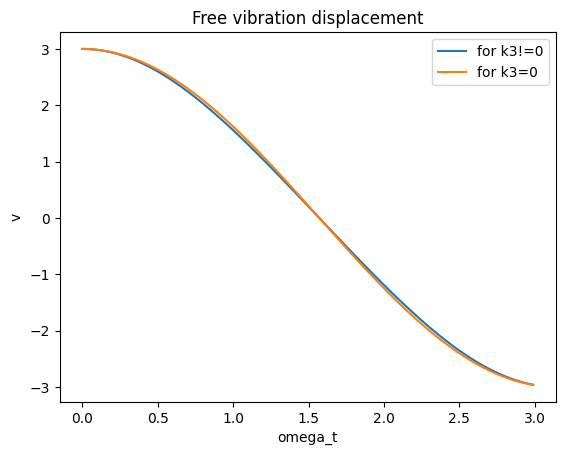

In [107]:
plt.plot(x, y1, label='for k3!=0')
plt.plot(x, y2, label='for k3=0')
plt.xlabel('omega_t')
plt.ylabel('v')
plt.title('Free vibration displacement')
plt.legend(loc='best')
plt.show()

Amplitude would depend on frequency for nonlinear cable restraints. 

### ex. 5.11

In [108]:
# m*ddv+c1*dv+k1*v=p1(t)

#### a).

In [109]:
# for undamped free horizontal vibration |=> m*ddv+k1*v=0

In [110]:
v0, omega0, t, k1, m, a1, b1 = symbols('v0, omega0, t, k1, m, a1, b1')

In [111]:
v=v0*sin(omega0*t)

In [112]:
diff(v,t,2)

-omega0**2*v0*sin(omega0*t)

In [113]:
# -m*omega0**2*v0*sin(omega0*t)+k1*v0*sin(omega0*t)=0

In [114]:
# omega0**2*m=a1-b1*omega0

In [115]:
sol=solve(omega0**2*m+b1*omega0-a1, omega0)

In [116]:
sol

[(-b1 - sqrt(4*a1*m + b1**2))/(2*m), (-b1 + sqrt(4*a1*m + b1**2))/(2*m)]

In [117]:
omega0 = sol[1]

In [118]:
Gs = 10e6 
vi = 0.33
r0 = 45
rho_s =2000
m0 = 3.56e8

In [119]:
a1=8*Gs/(2-vi)*r0
b1=8*Gs/(2-vi)*0.05*r0*np.sqrt(rho_s/Gs)*r0

In [120]:
a1

2155688622.754491

In [121]:
omega0_1 = (-b1 + np.sqrt(4*a1*m0 + b1**2))/(2*m0)

In [122]:
omega0_1

2.3662987797922628

In [123]:
T_1 = 2*np.pi/omega0_1

In [124]:
T_1

2.6552797815883533

In [125]:
Gs = 50e6 
vi = 0.33
r0 = 45
rho_s =2000
m0 = 3.56e8
mb = 2.59e8

In [126]:
a1=8*Gs/(2-vi)*r0
b1=8*Gs/(2-vi)*0.05*r0*np.sqrt(rho_s/Gs)*r0

In [127]:
a1

10778443113.772455

In [128]:
omega0_2 = (-b1 + np.sqrt(4*a1*m0 + b1**2))/(2*m0)

In [129]:
omega0_2

5.291204926690305

In [130]:
T_2 = 2*np.pi/omega0_2

In [131]:
T_2

1.1874772181824704

#### b).

In [132]:
c1=8/(2-vi)*np.sqrt(rho_s*Gs)*(0.67+0.02*omega0_1*r0*np.sqrt(rho_s/Gs))*r0**2
k1=a1-b1*omega0_1

In [133]:
zeta = c1/(2*np.sqrt(k1*m0))

In [134]:
zeta

0.5444054112844339

#### c).

In [135]:
# Sv=omega_0*v_max
# fmax=k1*v_max
# Mmax=h0*fmax

In [136]:
Sv = 10*0.0254  # from Fig. 5.8

In [137]:
v_max = Sv/omega0_1

In [138]:
v_max

0.10734062924306569

In [139]:
fmax = k1*v_max

In [140]:
fmax/10e6

111.80063627514241

In [141]:
h0=180

In [142]:
Mmax = h0*fmax

In [143]:
Mmax/10e9

20.124114529525635

#### d).

Additional damping, such as from surrounding water, would generally decrease the system response to earthquake excitation. Damping dissipates energy, reducing the amplitude of vibrations. Therefore, with increased damping, the peak values of horizontal displacement, horizontal shear load, and overturning moment would likely decrease.

### ex.5.12

In [144]:
# in accord with p.123-p.124 and section 5.2

In [145]:
# ddv+omega0**2*v+e*k3*v**3=e*p0*cos(omega*t)

In [146]:
# v=v0(t)+e*v1(t)
# omega**2=omega0**2+e*g_hat(a_hat)

In [147]:
# v(0) = a_hat
# dv(0) = 0

In [148]:
# ddv0+e*ddv1+(omega**2-e*g_hat(a_hat))*(v0+e*v1)+e*k3*(v0+e*v1)**3=e*p0*cos(omega*t)

In [149]:
# ddv0+e*ddv1+omega**2*v0-e*g_hat(a_hat)*v0+omega**2*e*v1-e*g_hat(a_hat)*e*v1+e*k3*(v0**3+3*v0**2*e*v1+3*v0*(e*v1)**2+(e*v1)**3)=e*p0*cos(omega*t)

In [150]:
# (ddv0+omega**2*v0)*e**0+(ddv1-g_hat(a_hat)*v0+omega**2*v1+k3*v0**3-p0*cos(omega*t))*e**1+o(e**2)=0

In [151]:
# ddv0 + omega**2*v0 = 0
# ddv1 - g_hat(a_hat)*v0 + omega**2*v1 + k3*v0**3 - p0*cos(omega*t) = 0

In [152]:
# ddv0 + omega**2*v0 = 0
# ddv1 + omega**2*v1 = g_hat(a_hat)*v0 - k3*v0**3 + p0*cos(omega*t)

In [153]:
# v0 = a_hat * cos(omega*t)

In [154]:
# ddv1 + omega**2*v1 = g_hat(a_hat)* a_hat * cos(omega*t) -k3*a_hat**3*cos(omega*t)**3+p0*cos(omega*t)

In [155]:
# cos(omega*t)**3 = 3/4*cos(omega*t)+1/4*cos(3*omega*t)

In [156]:
# ddv1 + omega**2*v1 = g_hat(a_hat)* a_hat * cos(omega*t) - k3*a_hat**3*(3/4*cos(omega*t)+1/4*cos(3*omega*t))+p0*cos(omega*t)

In [157]:
# v1 = C1*cos(3*omega*t)+C2*t*sin(omega*t)

In [158]:
# dv1 = -C1*3*omega*sin(3*omega*t)+C2*sin(omega*t)+C2*t*omega*cos(omega*t)

In [159]:
## ddv1 = -C1*9*omega**2*cos(3*omega*t)+C2*omega*cos(omega*t)+C2*omega*cos(omega*t)-C2*t*omega**2*sin(omega*t)

In [160]:
## -C1*9*omega**2*cos(3*omega*t)+2*C2*omega*cos(omega*t)-C2*t*omega**2*sin(omega*t)+omega**2*C1*cos(3*omega*t)+omega**2*C2*t*sin(omega*t)=
## g_hat(a_hat)* a_hat * cos(omega*t) - k3*a_hat**3*(3/4*cos(omega*t)+1/4*cos(3*omega*t))+p0*cos(omega*t)

In [161]:
# - C1*8*omega**2*cos(3*omega*t) = - k3*a_hat**3*1/4*cos(3*omega*t) |=>
# C1 = k3*a_hat**3*1/4/(8*omega**2) = k3*a_hat**3/(32*omega**2)

In [162]:
# 2*C2*omega*cos(omega*t) = g_hat(a_hat)* a_hat * cos(omega*t) - k3*a_hat**3*3/4*cos(omega*t) + p0*cos(omega*t)
# 2*C2*omega = g_hat(a_hat)* a_hat - k3*a_hat**3*3/4 + p0
# C2 = 1/(2*omega)*(g_hat(a_hat)* a_hat - k3*a_hat**3*3/4 + p0)

In [163]:
# g_hat(a_hat)* a_hat - 3/4*k3*a_hat**3 + p0 = 0

In [164]:
# g_hat(a_hat) = 3/4*k3*a_hat**2 - p0/a_hat

In [165]:
# by substituting the above equation into 5.84 and considering that e=1/m |=> eq. 5.86

### ex.5.13

In [166]:
# in accord with p.123-p.124 and section 5.2, ex. 5.12

In [167]:
# ddv+omega0**2*v+e*c1*dv+e*k3*v**3=e*p0*cos(omega*t)

In [168]:
# v=v0(t)+e*v1(t)
# omega**2=omega0**2+e*g_hat(a_hat)

In [169]:
# v(0) = a_hat
# dv(0) = 0

In [170]:
# ddv0+e*ddv1+(omega**2-e*g_hat(a_hat))*(v0+e*v1)+e*c1*(dv0+e*dv1)+e*k3*(v0+e*v1)**3=e*p0*cos(omega*t)

In [171]:
# ddv0+e*ddv1+omega**2*v0-e*g_hat(a_hat)*v0+omega**2*e*v1-e*g_hat(a_hat)*e*v1+e*c1*dv0+e*c1*dv1*e+e*k3*(v0**3+3*v0**2*e*v1+3*v0*(e*v1)**2+(e*v1)**3)=e*p0*cos(omega*t)

In [172]:
# (ddv0+omega**2*v0)*e**0+(ddv1-g_hat(a_hat)*v0+omega**2*v1+k3*v0**3-p0*cos(omega*t)+c1*dv0)*e**1+o(e**2)=0

In [173]:
# ddv0 + omega**2*v0 = 0
# ddv1 - g_hat(a_hat)*v0 + omega**2*v1 + k3*v0**3 - p0*cos(omega*t) + c1*dv0 = 0

In [174]:
# ddv0 + omega**2*v0 = 0
# ddv1 + omega**2*v1 = g_hat(a_hat)*v0 - k3*v0**3 + p0*cos(omega*t) -c1*dv0

In [175]:
# v0 = a_hat * cos(omega*t)

In [176]:
# ddv1 + omega**2*v1 = g_hat(a_hat)* a_hat * cos(omega*t) - k3*a_hat**3*cos(omega*t)**3+p0*cos(omega*t)+c1*omega*a_hat*sin(omega*t)

In [177]:
# cos(omega*t)**3 = 3/4*cos(omega*t)+1/4*cos(3*omega*t)

In [178]:
# ddv1 + omega**2*v1 = g_hat(a_hat)* a_hat * cos(omega*t) - k3*a_hat**3*(3/4*cos(omega*t)+1/4*cos(3*omega*t))+p0*cos(omega*t)+c1*omega*a_hat*sin(omega*t)

In [179]:
# v1 = C1*cos(3*omega*t) + C2*t*sin(omega*t) + C3*t*cos(omega*t)

In [180]:
# dv1= -C1*3*omega*sin(3*omega*t)+C2*sin(omega*t)+C2*omega*t*cos(omega*t)+C3*cos(omega*t)-C3*omega*t*sin(omega*t)

In [181]:
# ddv1=-C1*9*omega**2*cos(3*omega*t)+C2*omega*cos(omega*t)+C2*omega*cos(omega*t)-C2*omega**2*t*sin(omega*t)-
# -C3*omega*sin(omega*t)-C3*omega*sin(omega*t)-C3*omega**2*t*cos(omega*t)

In [182]:
# ddv1 = -C1*9*omega**2*cos(3*omega*t)+2*C2*omega*cos(omega*t)-C2*omega**2*t*sin(omega*t)-
# - 2*C3*omega*sin(omega*t)-C3*omega**2*t*cos(omega*t)

In [183]:
# -C1*9*omega**2*cos(3*omega*t)+2*C2*omega*cos(omega*t)-C2*omega**2*t*sin(omega*t)-
# - 2*C3*omega*sin(omega*t)-C3*omega**2*t*cos(omega*t)+omega**2*C1*cos(3*omega*t)+
# + omega**2* C2*t*sin(omega*t)+ omega**2*C3*t*cos(omega*t)=g_hat(a_hat)* a_hat * cos(omega*t) -
# - k3*a_hat**3*(3/4*cos(omega*t)+1/4*cos(3*omega*t))+p0*cos(omega*t)+c1*omega*a_hat*sin(omega*t)

In [184]:
# - C1*8*omega**2*cos(3*omega*t)=- k3*a_hat**3*1/4*cos(3*omega*t)
# C1 = k3*a_hat**3*1/4/(8*omega**2) = k3*a_hat**3/(32*omega**2)

In [185]:
# 2*C2*omega=g_hat(a_hat)* a_hat- k3*a_hat**3*3/4+p0
# - 2*C3*omega=c1*omega*a_hat

In [186]:
# C2 = 1/(2*omega)*(g_hat(a_hat)* a_hat- k3*a_hat**3*3/4+p0)
# C3 = -1/2*c1*a_hat

In [187]:
# C2*sin(omega*t)=-C3*cos(omega*t)

In [188]:
# t = 1/omega*arctg(-C3/C2) -  damping time ?

### ex.5.14

In [189]:
K, A, OMEGA = symbols('K, A, OMEGA')

In [190]:
diff(K*A**3-(OMEGA**2-1)*A-1,A)

3*A**2*K - OMEGA**2 + 1

In [191]:
# OMEGA**2=3*A**2*K+1=3*(k1/p0*a_hat)**2*3/4*k3/k1*(p0/k1)**2+1=3*3/4*a_hat**2*k3/k1+1

In [192]:
# 1/27*alpha**3+1/4*beta**2=0

In [193]:
k1, k3, OMEGA, p0 = symbols('k1, k3, OMEGA, p0')

In [194]:
# 1/27*((-4/3)*k1/k3*(OMEGA**2-1))**3+1/4*((-4/3)*k1/k3*p0/k1)**2=0

In [195]:
simplify(solve(1/27*((-4/3)*k1/k3*(OMEGA**2-1))**3+1/4*((-4/3)*k1/k3*p0/k1)**2, OMEGA**2)[2])

1.71707136383*(k3*p0**2/k1**3)**(1/3) + 1.0

In [196]:
# ((-4/3)*k1/k3)**2*(1/27*(-4/3)*k1/k3*(OMEGA**2-1)**3+1/4*(p0/k1)**2)=0

In [197]:
# 1/27*(-4/3)*k1/k3*(OMEGA**2-1)**3+1/4*(p0/k1)**2=0
# 1/27*(4/3)*k1/k3*(OMEGA**2-1)**3=1/4*(p0/k1)**2
# (OMEGA**2-1)**3=3/16*27*(p0/k1)**2*k3/k1=3/16*27*p0**2*k3/(k1**3)
# OMEGA**2 =3*(3/16*p0**2*k3)**(1/3)/k1+1

In [198]:
3*(3/16)**(1/3)

1.717071363829998

### ex.5.15

In [199]:
# ddv+omega0**2*v+e*k3*v**3=e*p0*cos(3*omega*t)

In [200]:
# ddv0 + omega**2*v0 = 0
# ddv1 + omega**2*v1 = g_hat(a_hat)*v0 - k3*v0**3 + p0*cos(3*omega*t)

In [201]:
# v0 = a_hat * sin(3*omega*t)

In [202]:
# ddv1 + omega**2*v1 = g_hat(a_hat) * a_hat * sin(3*omega*t) - k3*a_hat**3*sin(3*omega*t)**3+p0*cos(3*omega*t)

In [203]:
# v1 = C1*cos(3*omega*t) + C2*t*sin(3*omega*t)**3

In [204]:
# dv1 = -3*omega*C1*sin(3*omega*t)+C2*sin(3*omega*t)**3+
# +C2*t*3*sin(3*omega*t)**2*3*omega*cos(3*omega*t)=
# = -3*omega*C1*sin(3*omega*t)+C2*sin(3*omega*t)**3+
# +C2*t*3*(1-cos(3*omega*t)**2)*3*omega*cos(3*omega*t) =
# = -3*omega*C1*sin(3*omega*t)+C2*sin(3*omega*t)**3+
# +C2*t*3*3*omega*cos(3*omega*t)+C2*t*3*3*omega*cos(3*omega*t)**3

In [205]:
# ddv1 =  - 9*omega**2*C1*cos(3*omega*t)+
# + C2*3*sin(3*omega*t)**2*3*omega*cos(3*omega*t)+
# +C2*3*3*omega*cos(3*omega*t)-C2*t*3*9*omega**2*sin(3*omega*t)+
# +C2*3*3*omega*cos(3*omega*t)**3-C2*3*t*3*3*omega**2*3*cos(3*omega*t)**2*sin(3*omega*t)=
# = - 9*omega**2*C1*cos(3*omega*t)+
# +C2*3*3*omega*cos(3*omega*t)-C2*3*3*omega*cos(3*omega*t)**3+
# +C2*3*3*omega*cos(3*omega*t)-C2*t*3*9*omega**2*sin(3*omega*t)+
# +C2*3*3*omega*cos(3*omega*t)**3-C2*3*t*3*3*omega**2*3*sin(3*omega*t)+
# +C2*3*t*3*3*omega**2*3*sin(3*omega*t)**3=
# = - 9*omega**2*C1*cos(3*omega*t)+
# +C2*3*3*omega*cos(3*omega*t)
# +C2*3*3*omega*cos(3*omega*t)-C2*t*3*9*omega**2*sin(3*omega*t)+
# -C2*3*t*3*3*omega**2*3*sin(3*omega*t)+
# + C2*3*t*3*3*omega**2*3*sin(3*omega*t)**3

In [206]:
# - 9*omega**2*C1+C2*3*3*omega+C2*3*3*omega+C1*omega**2 =
# = p0

# -8*omega**2*C1+18*C2*omega=p0

In [207]:
# -C2*t*3*9*omega**2-C2*3*t*3*3*omega**2*3=g_hat(a_hat) * a_hat 

# -C2*t*3*9*omega**2*4=g_hat(a_hat) * a_hat 
# C2*t*omega**2*27*4=-g_hat(a_hat) * a_hat 

In [208]:
# C2*3*t*3*3*omega**2*3+C2*t*omega**2 = - k3*a_hat**3
#C2*t*omega**2*28 = - k3*a_hat**3

In [209]:
# -g_hat(a_hat) * a_hat /(27*4)=- k3*a_hat**3/28

In [210]:
# g_hat(a_hat) = 27/7*k3*a_hat**2

In [211]:
# omega = (omega0**2+27/(7*m)*k3*a_hat**2)**0.5